# Project 3: Web APIs & Classification

## Problem Statement

A business man in the FF fitness industry wants to expand his business by venturing into new market sector. However, he cannot decide whether to venture into selling supplements or seting up resturants that sells healthy and afforable food. He wants his team to do some market study using post from subreddit since it is the sixth-most-popular website.

Reddit admins sent one big dataset without seperating the subreddit post. Being a data analysts in the FF fitness company, I was assigned to seperate the posts and send to the relevent marketing team for market studies.







*All libraries used*

In [1]:
import requests
import time
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid', palette='muted')
%matplotlib inline

## Data Import and Cleaning

Cleaning on eatcheap.csv ( From subreddit : EatCheapAndHealthy)

In [2]:
#Reading the data
eatcheap_df = pd.read_csv("../datasets/eatcheap.csv")
supple_df = pd.read_csv("../datasets/supple.csv")

pd.options.display.max_columns = None

In [3]:
eatcheap_df.head(2)

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,awarders,banned_at_utc,banned_by,can_gild,can_mod_post,category,clicked,content_categories,contest_mode,created,created_utc,discussion_type,distinguished,domain,downs,edited,gilded,gildings,hidden,hide_score,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,likes,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_metadata,media_only,mod_note,mod_reason_by,mod_reason_title,mod_reports,name,no_follow,num_comments,num_crossposts,num_reports,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,quarantine,removal_reason,report_reasons,saved,score,secure_media,secure_media_embed,selftext,selftext_html,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],False,NaN,NaN,False,unreal_reality_,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_4knguku,False,[],NaN,NaN,False,False,NaN,False,NaN,False,1.571393e+09,1.571364e+09,NaN,NaN,self.EatCheapAndHealthy,0,False,0,{},False,False,djgkb5,False,False,False,False,True,True,False,NaN,NaN,m-rd,[],NaN,Ask ECAH,dark,text,False,NaN,{},NaN,False,NaN,NaN,NaN,[],t3_djgkb5,True,2,0,NaN,False,all_ads,/r/EatCheapAndHealthy/comments/djgkb5/what_are...,False,NaN,NaN,6,False,NaN,NaN,False,0,NaN,{},I’m gonna be snowboarding and working out the ...,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",True,False,[],False,EatCheapAndHealthy,t5_2vvpi,r/EatCheapAndHealthy,1512071,public,NaN,self,NaN,NaN,What are some high calorie foods for an extrem...,0,0,https://www.reddit.com/r/EatCheapAndHealthy/co...,[],NaN,False,all_ads,6
1,[],False,NaN,NaN,False,JSHFV222,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_3xpaajt2,False,[],NaN,NaN,False,False,NaN,False,NaN,False,1.571393e+09,1.571364e+09,NaN,NaN,self.EatCheapAndHealthy,0,False,0,{},False,False,djgisf,False,False,False,False,True,True,False,NaN,NaN,m-rd,[],NaN,Ask ECAH,dark,text,False,NaN,{},NaN,False,NaN,NaN,NaN,[],t3_djgisf,True,2,0,NaN,False,all_ads,/r/EatCheapAndHealthy/comments/djgisf/what_is_...,False,NaN,NaN,6,False,NaN,NaN,False,0,NaN,{},NaN,NaN,True,False,[],False,EatCheapAndHealthy,t5_2vvpi,r/EatCheapAndHealthy,1512071,public,NaN,self,NaN,NaN,What is the most underrated food that people s...,0,0,https://www.reddit.com/r/EatCheapAndHealthy/co...,[],NaN,False,all_ads,6


In [4]:
eatcheap_df.shape

(1152, 104)

In [5]:
#Drop duplicates rows
eatcheap_df.drop_duplicates(inplace=True)

In [6]:
#Checking for null in interested column.
eatcheap_df['selftext'].isnull().sum()

65

In [7]:
#Filling all those supple_df 'selftext' NaN with '---'.
eatcheap_df['selftext'] = eatcheap_df['selftext'].fillna('---')

In [8]:
#Checking for null.
eatcheap_df['selftext'].isnull().sum()

0

In [9]:
#Checking number of rows left after dropping duplicates
eatcheap_df.shape

(1061, 104)

In [10]:
#Check the eatcheap column 'selftext' type
eatcheap_df['selftext'].dtype

dtype('O')

In [11]:
#Convert 'selftext' column to string instead of object
eatcheap_df['selftext'] = eatcheap_df['selftext'].astype(str)

In [12]:
#Conver all string to lower case
eatcheap_df['selftext'] = eatcheap_df['selftext'].str.lower()

In [13]:
eatcheap_df_extract = eatcheap_df.filter(['selftext', 'subreddit'])

*Cleaning on supple.csv ( From subreddit : Supplements)*

In [14]:
supple_df.head(2)

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,awarders,banned_at_utc,banned_by,can_gild,can_mod_post,category,clicked,content_categories,contest_mode,created,created_utc,crosspost_parent,crosspost_parent_list,discussion_type,distinguished,domain,downs,edited,gilded,gildings,hidden,hide_score,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,likes,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_only,mod_note,mod_reason_by,mod_reason_title,mod_reports,name,no_follow,num_comments,num_crossposts,num_reports,over_18,parent_whitelist_status,permalink,pinned,pwls,quarantine,removal_reason,report_reasons,saved,score,secure_media,secure_media_embed,selftext,selftext_html,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],False,NaN,NaN,False,gableon,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_2ph44wbf,False,[],NaN,NaN,False,False,NaN,False,NaN,False,1.571394e+09,1.571366e+09,NaN,NaN,NaN,NaN,self.Supplements,0,False,0,{},False,False,djguvf,False,False,False,False,True,True,False,NaN,NaN,NaN,[],NaN,NaN,dark,text,False,NaN,{},False,NaN,NaN,NaN,[],t3_djguvf,True,12,0,NaN,False,all_ads,/r/Supplements/comments/djguvf/started_taking_...,False,6,False,NaN,NaN,False,2,NaN,{},"Yesterday was my first day, i took one 5mg at ...","&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",False,False,[],False,Supplements,t5_2qhb8,r/Supplements,102028,public,NaN,NaN,Started taking melatonin and hasn’t worked.,0,2,https://www.reddit.com/r/Supplements/comments/...,[],NaN,False,all_ads,6
1,[],False,NaN,NaN,False,franzybear,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_12wlkr,False,[],NaN,NaN,False,False,NaN,False,NaN,False,1.571388e+09,1.571359e+09,NaN,NaN,NaN,NaN,self.Supplements,0,False,0,{},False,False,djfgit,False,False,False,False,True,True,False,NaN,NaN,NaN,[],NaN,NaN,dark,text,False,NaN,{},False,NaN,NaN,NaN,[],t3_djfgit,True,0,0,NaN,False,all_ads,/r/Supplements/comments/djfgit/life_extension_...,False,6,False,NaN,NaN,False,3,NaN,{},Just picked up a bottle and am curious;\n\nHow...,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",True,False,[],False,Supplements,t5_2qhb8,r/Supplements,102028,public,NaN,NaN,Life Extension 2 Per Day Capsules,0,3,https://www.reddit.com/r/Supplements/comments/...,[],NaN,False,all_ads,6


In [15]:
supple_df.shape

(1194, 101)

In [16]:
#Drop duplicates rows
supple_df.drop_duplicates(inplace=True)


In [17]:
#Checking for null in interested column.
supple_df['selftext'].isnull().sum()

6

In [18]:
#Filling all those supple_df 'selftext' NaN with '---'.
supple_df['selftext'] = supple_df['selftext'].fillna('---')

In [19]:
supple_df['selftext'].isnull().sum()

0

In [20]:
#Checking number of rows left after dropping duplicates
supple_df.shape

(1081, 101)

In [21]:
#Convert 'selftext' column to string instead of object
supple_df['selftext'] = supple_df['selftext'].astype(str)

In [22]:
#Conver all string to lower case
supple_df['selftext'] = supple_df['selftext'].str.lower()

In [23]:
supple_df_extract = supple_df.filter(['selftext', 'subreddit'])

In [24]:
#Concat. 2 dataframe into 1
combine_df = pd.concat([eatcheap_df_extract, supple_df_extract],axis=0)

#Rename columns and map EatCheapAndHealthy as 0 and Supplements as 1
combine_df.rename(columns={'subreddit': 'label'},inplace = True)
combine_df['label'] = combine_df['label'].map({'EatCheapAndHealthy':0, 'Supplements':1})

In [25]:
from sklearn.utils import shuffle
combine_df = shuffle(combine_df)
combine_df = combine_df.reset_index(drop=True)

In [26]:
combine_df.head(10)

,selftext,label
0,my genetics have given me very defined vascula...,1
1,i've been eating spinach &amp; kale with tomat...,0
2,"this is how i usually eat breakfast, it gradua...",0
3,"i'm not looking to spend a ton, but i don't wa...",0
4,my fiancee is having a difficult time finding ...,1
5,i've started taking bcaa because i'm vegan and...,1
6,i’ve been taking 500mg of d-limonene for 2mont...,1
7,"i search for recipes for simple tater tots, bu...",0
8,what’s everyone’s opinion on bcaas?\ni used it...,1
9,obviously staple ingredients will vary greatly...,0


## Model preparation

### Train/Test Split

Splitting the data into train and test set before doing the processing

In [27]:
# Import train_test_split.
from sklearn.model_selection import train_test_split

# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(combine_df[['selftext']],
                                                    combine_df['label'],
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    shuffle = True, 
                                                    stratify=combine_df['label'])

In [28]:
X_test.head()

,selftext
1667,hi! \ni’ve never really chose healthy foods an...
650,i want (and need) to start adding more veggies...
1283,so i’ve actually posted about this a few days ...
2019,i pride myself on being able to wake up and be...
1966,considering our diets are typically high in co...


In [29]:
X_train.head()

,selftext
1194,"so, brie isn't super cheap, but i love it in r..."
725,i need help coming up with meals that are good...
328,i've never been great at including vegetables ...
1119,for those of you that take a high quality hair...
94,hi reddit!\n\nwe host drinks for our team of 2...


In [30]:
y_test.head()

1667    0
650     0
1283    1
2019    0
1966    1
Name: label, dtype: int64

In [31]:
y_train.head()

1194    0
725     0
328     0
1119    1
94      0
Name: label, dtype: int64

### Pre-Processing

In [32]:
#Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Removing HTML code artifacts
from bs4 import BeautifulSoup  
# Import stopwords list
from nltk.corpus import stopwords
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
#Import Regular Expression
import regex as re

*Added the words 'supplement', and 'supplements' into the stopwords since 'Supplements' happen to be the subreddit title. Other words like eat, cheap, and healthy are possible words that can also appear in subreddit 'Supplemement'. So is not added into the stopwords list.*

In [33]:
stopwords = stopwords.words('english')
newStopWords = ['supplement','supplements']
stopwords.extend(newStopWords)

In [34]:
#Checking to see 'supplement' and 'supplements' being added.
stops = set(stopwords)
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
def selftext_to_words(raw_selftext):
    # Function to convert raw selftext to a string of words
    # Input is a single string (a raw selftext), and 
    # output is a single string (a preprocessed selftext)
    
    # 1. Remove HTML.
    combine_selftext_BS = BeautifulSoup(raw_selftext)
    combine_selftext = combine_selftext_BS.get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", combine_selftext)
    
    # 3.Tokenizing
    tokenizer = RegexpTokenizer('[a-zA-z]\w+')
    combine_tokens = tokenizer.tokenize(letters_only)
        
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords)
    
    # 5. Remove stop words.
    remove_stop_words = [w for w in combine_tokens if not w in stops]
    
    # 6. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    meaningful_words = [lemmatizer.lemmatize(i) for i in remove_stop_words]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [36]:
# Get the number of reviews based on the dataframe size.
total_selftext = combine_df.shape[0]
print(f'There are {total_selftext} text.')

# Initialize an empty list to hold the clean text.
clean_train = []
clean_test = []

There are 2142 text.


In [37]:
print("Cleaning and parsing the training set ...")

j = 0
for train_selftext in X_train['selftext']:
    # Convert review to words, then append to clean_train_reviews.
    clean_train.append(selftext_to_words(train_selftext))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 1000 == 0:
        print(f'Review {j + 1} of {total_selftext}.')
    
    j += 1

print("Cleaning and parsing the testing set ...")    
for test_selftext in X_test['selftext']:
    # Convert review to words, then append to clean_train_reviews.
    clean_test.append(selftext_to_words(test_selftext))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 1000 == 0:
        print(f'Review {j + 1} of {total_selftext}.')
    
    j += 1
    
print("Cleaning done ...")

Cleaning and parsing the training set ...
Review 1000 of 2142.
Cleaning and parsing the testing set ...
Review 2000 of 2142.
Cleaning done ...


## Exploratory Data Analysis

The WordCloud is from Peekaboo.

In [38]:
# From https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

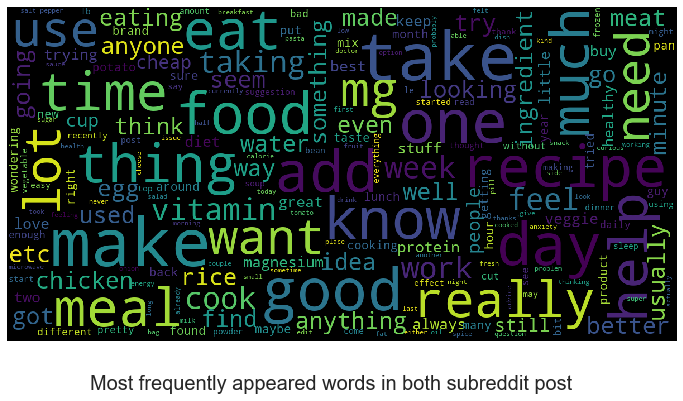

In [39]:
#Showing most frequent appear words in wordcloud.
show_wordcloud(clean_train, title = "Most frequently appeared words in both subreddit post")

### Baseline accuracy

In [40]:
#Calculate baseline accuracy in order to tell if our model is outperforming the null model 
#(predicting the majority class).
combine_df['label'].value_counts(normalize=True)

1    0.504669
0    0.495331
Name: label, dtype: float64

### CountVectorizer

In [41]:
# NLP Using a count vectorizer for EDA purpose.
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# Setting the vectorizer
cv = CountVectorizer()

# Fitting the vectorizer on clean data
cv.fit(clean_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [43]:
# Check the length of clean data that is in a vectorized state
len(cv.get_feature_names())

8113

In [44]:
# Transforming vertorize clean data and converting the result to a DataFrame.
cv_df = pd.DataFrame(cv.transform(clean_train).todense(),
                       columns=cv.get_feature_names())

In [45]:
cv_df.shape

(1606, 8113)

In [46]:
# Which words appear the most no. of time?
word_counts = cv_df.sum(axis=0)
print(len(word_counts))
word_counts.sort_values(ascending = False).head(20)

8113


like       684
day        521
make       512
take       507
would      452
also       450
get        444
time       433
chicken    406
add        402
mg         396
know       382
eat        380
one        380
good       374
vitamin    371
food       369
meal       355
taking     340
recipe     337
dtype: int64

In [47]:

top_cv_df =pd.DataFrame({'word':cv_df.columns,
                         'word_count':cv_df.sum()})
top_cv_df = top_cv_df.sort_values('word_count',ascending = False).head(20)

Text(0, 0.5, 'Count')

<Figure size 1080x576 with 0 Axes>

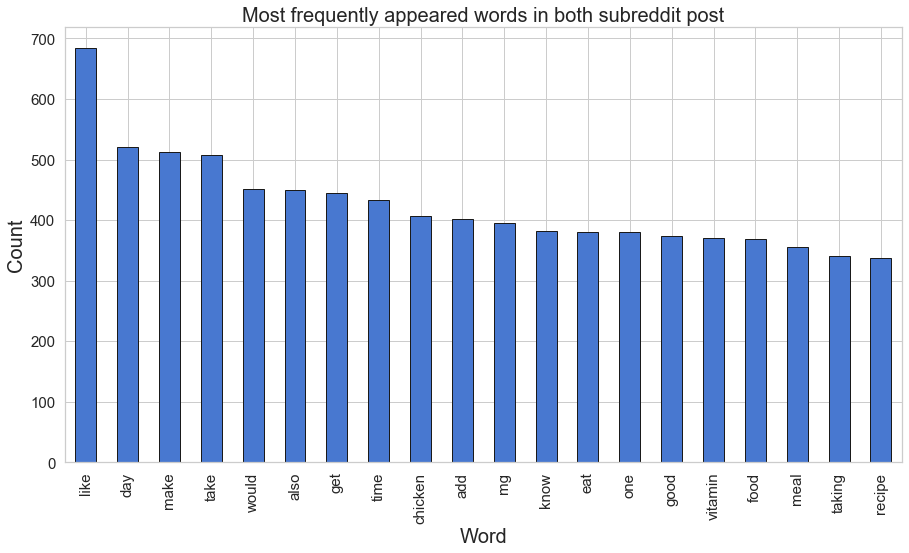

In [48]:
#To view the actual word counts using count vectorizer.
fig = plt.figure(figsize=(15,8))
top_cv_df.plot(kind = 'bar',figsize=(15, 8), fontsize=15, legend=False, edgecolor='k')
plt.tick_params(axis='both', width=15)
plt.title("Most frequently appeared words in both subreddit post", fontsize = 20)
plt.xlabel("Word", fontsize = 20)
plt.ylabel("Count", fontsize = 20)

In [49]:
#Convert to dataframe for common words in subreddit post 'EatCheapAndHealthy'
top_eat_df =pd.DataFrame({'word':cv_df[(np.array(y_train))==0],
                         'word_count':cv_df[(np.array(y_train))==0].sum(axis=0)})
top_eat_df = top_eat_df.sort_values('word_count',ascending = False).head(15)

In [50]:
#Convert to dataframe for common words in subreddit post 'Supplements'
top_supple_df =pd.DataFrame({'word':cv_df[(np.array(y_train))==1],
                         'word_count':cv_df[(np.array(y_train))==1].sum(axis=0)})
top_supple_df = top_supple_df.sort_values('word_count',ascending = False).head(15)

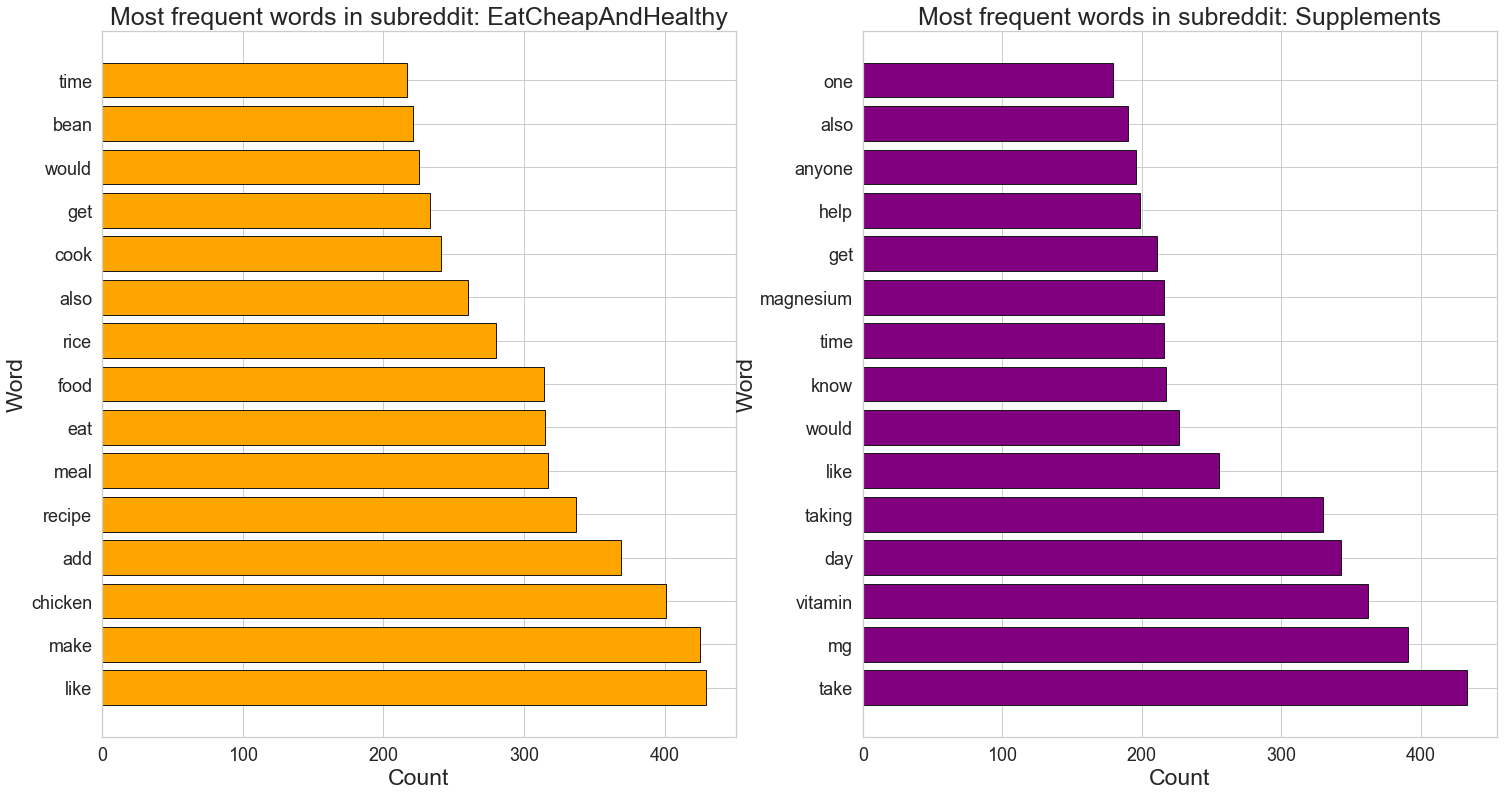

In [51]:
fig = plt.figure(figsize=(25,13))

ax= fig.add_subplot(1,2,1)
#top_eat_df.plot(kind = 'barh',figsize=(8, 8), fontsize=12,legend=False);
plt.barh(top_eat_df.index,top_eat_df['word_count'], color='orange', edgecolor='k');
plt.title("Most frequent words in subreddit: EatCheapAndHealthy", fontsize = 25)
plt.xlabel("Count", fontsize = 23)
plt.ylabel("Word", fontsize = 23)
plt.tick_params(axis='both', labelsize = 18)

ax= fig.add_subplot(1,2,2)
#top_supple_df.plot(kind = 'barh',figsize=(8, 8), fontsize=12,legend=False);
plt.barh(top_supple_df.index,top_supple_df['word_count'], color='purple',edgecolor='k' );
plt.title("Most frequent words in subreddit: Supplements", fontsize = 25)
plt.xlabel("Count", fontsize = 23)
plt.ylabel("Word", fontsize = 23)
plt.tick_params(axis='both', labelsize = 18)



## Model 1 - Logistic Regresssion

### 1a) Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([('cvec', CountVectorizer()),
                  ('lr', LogisticRegression())
])

### 1b) Hyperparameters Tuning - Using GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV
#For CountVectorizer:
pipe_params_cv = {
    'cvec__max_features': [2000, 2500, 3000, 3500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [54]:
start_time = time.time()
gs = GridSearchCV(pipe_lr, param_grid=pipe_params_cv, cv=5)
model1 = gs.fit(clean_train, y_train)

print("Best: %f using %s" % (model1.best_score_, model1.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.942715 using {'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1)}
Execution time: 27.999130964279175 ms


In [55]:
model1.score(clean_train, y_train)

0.9925280199252802

In [56]:
model1.score(clean_test, y_test)

0.9291044776119403

*Logistic regression is extremely overfitted. The test data did not score as good as the training data. However, i think result is still pretty good overall.*

## Model 2 - Naive Bayes

There are 3 types of Naive Bayes modelling (BernoulliNB, MultinomialNB, GaussianNB), i decided to pick MultinomialNB since columns of X are all interger count.

### 2a) Pipeline

In [57]:
from sklearn.naive_bayes import MultinomialNB

pipe_nb = Pipeline([('cvec', CountVectorizer()),
                  ('nb', MultinomialNB())
])

### 2b) Hyperparameters Tuning

In [58]:
gs_nb = GridSearchCV(pipe_nb, param_grid=pipe_params_cv, cv=5)
model2 = gs_nb.fit(clean_train, y_train)
print("Best: %f using %s" % (model2.best_score_, model2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.928394 using {'cvec__max_df': 0.9, 'cvec__max_features': 3500, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}
Execution time: 66.29449105262756 ms


In [59]:
model2.score(clean_train, y_train)

0.9445828144458281

In [60]:
model2.score(clean_test, y_test)

0.9421641791044776

*Naive Bayes MultinomialNB has a good score for both the training and testing set. Both results is quite close. The Naive Bayes model performs better than the Logistic regression. However, computational time with Hyperparameters tuning is longer than Logistic regression*

In [61]:
model2.predict_proba(clean_test)

array([[1.00000000e+00, 9.30784503e-15],
       [1.00000000e+00, 3.28891609e-11],
       [4.05107231e-43, 1.00000000e+00],
       ...,
       [2.45129295e-10, 1.00000000e+00],
       [2.07796955e-02, 9.79220305e-01],
       [1.00000000e+00, 5.23919364e-11]])

## Model 3 - Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

### 3a) Pipeline

In [63]:
pipe_rf = Pipeline([('cvec', CountVectorizer()),
                  ('rf', RandomForestClassifier())
])

### 3b) Hyperparameters Tuning

In [64]:
cvec_rf_params = {
    'cvec__max_features': [2000, 2500, 3000, 3500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    #'rf__n_estimators': [100, 150, 200],
    #'rf__max_depth': [None, 1, 2, 3],
}
gs_rf = GridSearchCV(pipe_rf , param_grid=cvec_rf_params, cv=5)
model3= gs_rf.fit(clean_train, y_train)
print("Best: %f using %s" % (model3.best_score_, model3.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.922167 using {'cvec__max_df': 0.95, 'cvec__max_features': 2500, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1)}
Execution time: 264.37051367759705 ms


In [65]:
gs_rf.score(clean_train, y_train)

0.9968866749688667

In [66]:
gs_rf.score(clean_train, y_train)

0.9968866749688667

*Among the 3 models, Random Forest has the best results for both the train set and test set. Thou Random Forest perform pretty well, they are not as easy to visually interpret. Execution time is also longest among the 3 models with just tuning on the count vectorizers only.*

- All 3 models appears be extremely overfit. I probably could have
  - collect more data, 
  - use fewer features by setting `max_features` to a smaller number when instantiating our CountVectorizer,
  - try TF-IDF Vectorizer
- Both training performance and testing performance are pretty close, so there are not a lot of changes required.

## Model Selection

*Base on the 3 models, I have decided to select Model 2 which is the Naive Bayes modelling (MultinomialNB) as my final model. It did not perfrom as good as Model 3 (Random Forest), but is more easily interpretable and shorter computational time. Using Model 2, i will continue to do the confusion matirix and the ROC AUC.*

In [67]:
# Generate our predictions.
predictions = model2.predict(clean_test)

In [68]:
# Import the confusion matrix function.
from sklearn.metrics import confusion_matrix

In [69]:
# Generate a confusion matrix.
cm = confusion_matrix(y_test, predictions)
cm

array([[243,  22],
       [  9, 262]], dtype=int64)

In [70]:
tn, fp, fn, tp = cm.ravel()

In [71]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 243
False Positives: 22
False Negatives: 9
True Positives: 262


In [72]:
cm_df = pd.DataFrame(cm, columns=['Pred. Supplement', 'Pred. EatCheapAndHealthy'], index=['Actual Supplement', 'Actual EatCheapAndHealthy'])
cm_df

,Pred. Supplement,Pred. EatCheapAndHealthy
Actual Supplement,243,22
Actual EatCheapAndHealthy,9,262


In [73]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f'Accuracy: {round(accuracy,4)}')

Accuracy: 0.9422


In [74]:
specificity = tn / (tn + fp)
print(f'Specificity: {round(specificity,4)}')

Specificity: 0.917


In [75]:
sensitivity = tp / (tp + fn)
print(f'sensitivity: {round(sensitivity,4)}')

sensitivity: 0.9668


#### ROC AUC Curve

In [76]:
from sklearn.metrics import roc_auc_score

# Create dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model2.

pred_proba = [i[1] for i in gs_nb.predict_proba(clean_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df

,true_values,pred_probs
1667,0,9.307845e-15
650,0,3.288916e-11
1283,1,1.000000e+00
2019,0,2.740375e-02
1966,1,1.000000e+00
121,1,9.999996e-01
1723,0,2.708573e-09
464,0,7.313736e-49
1890,0,1.274956e-18
1003,0,5.681886e-02


In [77]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9821694632040661

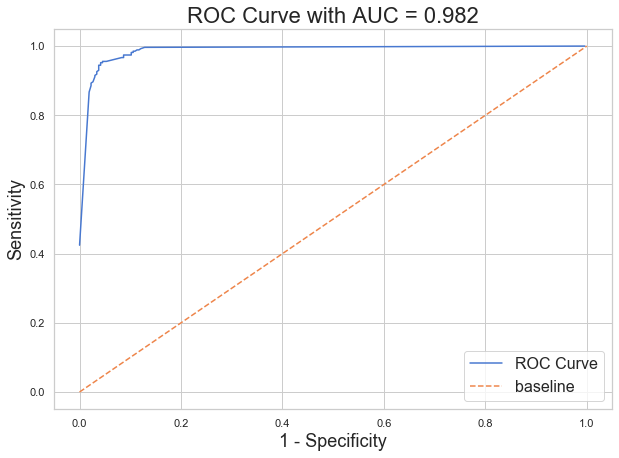

In [78]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

The more area under the blue curve, the better separation of distributions.
- An ROC AUC of 1(maximum score), positive and negative populations are perfectly separated.
- Based on the above plot with score of 0.982, it has a better good seperation.

## Model Testing

In [79]:
#Reading the test data
testeatcheap_df = pd.read_csv("../datasets/test_eatcheap.csv")
testsupple_df = pd.read_csv("../datasets/test_supple.csv")

In [80]:
#Drop duplicates rows
testeatcheap_df.drop_duplicates(inplace=True)
testsupple_df.drop_duplicates(inplace=True)

In [81]:
#Checking for null in interested column.
testeatcheap_df['selftext'].isnull().sum()

10

In [82]:
#Checking for null in interested column.
testsupple_df['selftext'].isnull().sum()

0

In [83]:
#Filling all those supple_df 'selftext' NaN with '---'.
testeatcheap_df['selftext'] = testeatcheap_df['selftext'].fillna('---')

In [84]:
#Checking for null.
testeatcheap_df['selftext'].isnull().sum()

0

In [85]:
#Convert 'selftext' column to string instead of object
testeatcheap_df['selftext'] = testeatcheap_df['selftext'].astype(str)
testsupple_df['selftext'] = testsupple_df['selftext'].astype(str)

In [86]:
#Conver all string to lower case
testeatcheap_df['selftext'] = testeatcheap_df['selftext'].str.lower()
testsupple_df['selftext'] = testsupple_df['selftext'].str.lower()

In [87]:
testeatcheap_df_extract = testeatcheap_df.filter(['selftext', 'subreddit'])
testsupple_df_extract = testsupple_df.filter(['selftext', 'subreddit'])

In [88]:
#Concat. 2 dataframe into 1
combinetest_df = pd.concat([testeatcheap_df_extract, testsupple_df_extract],axis=0)

#Rename columns and map EatCheapAndHealthy as 0 and Supplements as 1
combinetest_df.rename(columns={'subreddit': 'label'},inplace = True)
combinetest_df['label'] = combinetest_df['label'].map({'EatCheapAndHealthy':0, 'Supplements':1})

In [89]:
from sklearn.utils import shuffle
combinetest_df = shuffle(combinetest_df)
combinetest_df = combinetest_df.reset_index(drop=True)

In [90]:
# Get the number of reviews based on the dataframe size.
totaltest_selftext = combinetest_df.shape[0]
print(f'There are {totaltest_selftext} text.')

# Initialize an empty list to hold the clean text.
cleantest = []

There are 200 text.


In [91]:
print("Cleaning and parsing the test set ...")

for traintest_selftext in combinetest_df['selftext']:
    # Convert review to words, then append to clean_train_reviews.
    cleantest.append(selftext_to_words(traintest_selftext))
    

Cleaning and parsing the test set ...


In [92]:
model2.score(cleantest, combinetest_df['label'])

0.88

## Conclusion

*Based on the result of the unseen test dataset on my model 2 selection, it did not score as good as I expected based on the training set result.
So with every 100 posts , there are about 12 posts that my models would not classify correctly. 
I could probably do tuning on the MultinomialNB() hyperparameter to get a better result.*